## Zeta Prediction Disease Challenge



Mars Mission Control needs a good data-driven system for predicting Zeta Disease infection on the International Mars Colony.
Use the `_zeta-disease_training-data_` dataset to build a model that can predict who will be infected by Zeta Disease.
Apply your model to the `_zeta-disease_prediction-data_` dataset to predict who will be infected by Zeta Disease.



The dataset includes 9 columns with information on 800 people.
1.	age : in years
2.	weight : body weight in pounds (lbs)
3.	bmi : Body Mass Index (weight in kg/(height in m)2)
4.	blood_pressure : resting blood pressure (mm Hg)
5.	insulin_test : inuslin test value
6.	liver_stress_test : liver_stress_test value
7.	cardio_stress_test : cardio_stress_test value
8.	years_smoking : number of years of smoking
9.	zeta_disease :
              1 = yes;
              0 = no

The first step is to import the initial libraries I will be using for this exercise:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

First, EDA needs to be conducted in order to get an understanding of the data and see if there are any correlations between the dependent variable (zeta_disease) and the indepedent variables.

Below, the training data is imported:

In [3]:
training = pd.read_csv("zeta_training_set.csv")
training.head(5)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


As can be seen above, there are various attributes such as age, weight, bmi, and blood pressure.
What also is noticable is the fact there are different scales of measurement among the variables such as liver_stress_test or BMI which I will address further along this notebook.

Next, I'll be getting more information on the dataset:

In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    int64  
 1   weight              800 non-null    int64  
 2   bmi                 800 non-null    float64
 3   blood_pressure      800 non-null    int64  
 4   insulin_test        800 non-null    int64  
 5   liver_stress_test   800 non-null    float64
 6   cardio_stress_test  800 non-null    int64  
 7   years_smoking       800 non-null    int64  
 8   zeta_disease        800 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


Looking above, the dataset is composed of 9 columns with 800 observations with integer and float types. There are no NULL values so there is nothing that needs to be imputed or removed which is good.

In [5]:
training['zeta_disease'].value_counts()

0    521
1    279
Name: zeta_disease, dtype: int64

Looking at the zeta_disease variable counts, there's about 521 observations marked with 0 and 279 observations showing 1. There's a slight imbalance but I don't believe the imbalance is large enough to where I would have to oversample the minority class or undersample the minority class just at a glance to fix any drastic imbalance.

Below, a correlation matrix has been created in order to see which variables could have an effect on the likelihood of getting infected by the Zeta Disease:

In [6]:
training.corr()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
age,1.000000,0.157705,0.035347,0.193066,-0.034294,0.042416,-0.106039,0.372373,0.192925
weight,0.157705,1.000000,0.214262,0.122349,0.304295,0.146779,0.053629,0.100834,0.471155
bmi,0.035347,0.214262,1.000000,0.240513,0.217265,0.116649,0.264861,0.028683,0.271856
blood_pressure,0.193066,0.122349,0.240513,1.000000,0.079425,0.045764,0.193221,0.095613,0.045739
insulin_test,-0.034294,0.304295,0.217265,0.079425,1.000000,0.175230,0.417894,-0.006292,0.126504
liver_stress_test,0.042416,0.146779,0.116649,0.045764,0.175230,1.000000,0.172048,0.021817,0.184738
cardio_stress_test,-0.106039,0.053629,0.264861,0.193221,0.417894,0.172048,1.000000,-0.080358,0.036090
years_smoking,0.372373,0.100834,0.028683,0.095613,-0.006292,0.021817,-0.080358,1.000000,0.195261
zeta_disease,0.192925,0.471155,0.271856,0.045739,0.126504,0.184738,0.036090,0.195261,1.000000


Looking above, it seems there are strong positive correlations between zeta_disease and a number of variables.

For instance, weight seems to be the most positively correlated with zeta_disease with a coeffcient of 0.47, followed by bmi with 0.27, years_smoking with 0.195, age with 0.1929, and liver_stress_test with 0.18 roughly. Weight, in particular, seems to be playing the highest factor as to whether someone will get infected or not. These initial findings could prove useful in terms of predicting who will get infected with the Zeta disease.

Next, I'd like to focus on the distributions between the dependent variable (zeta_disease) and the independent variables in order to understand the data more:

### Age

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

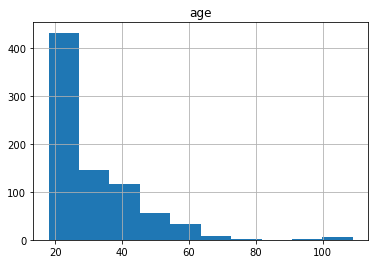

In [7]:
training.hist(column='age')

Age seems to be negatively skewed to the right as around 400 observations seem to be binned around 15-30 years of age with a few outliers at 100 years of age. I'd consider getting rid of them but I believe those observations should stay as it is possible for someone to be 100 years of age and it would be considered a valid observation.

### Weight

<function matplotlib.pyplot.show(close=None, block=None)>

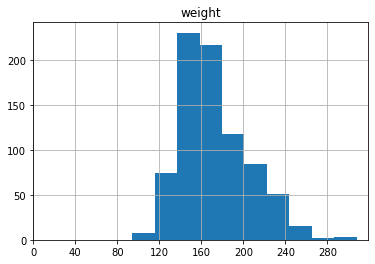

In [8]:
training.hist(column='weight')
plt.xticks(np.arange(0, 300, 40))
plt.show

In contrast, weight seems to come close to a normal distribution with a slight tail to the left. Most of the observations seem to fall between 140 and 180 pounds.

### Blood Pressure

array([[<AxesSubplot:title={'center':'blood_pressure'}>]], dtype=object)

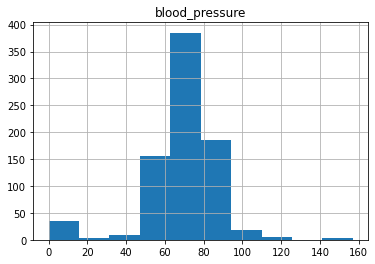

In [9]:
training.hist(column='blood_pressure')

Blood pressure also seems to follow a normal distribution. The highest number of observations seem to fall between 60-80 in terms of blood pressure levels.

### Insulin Test

<function matplotlib.pyplot.show(close=None, block=None)>

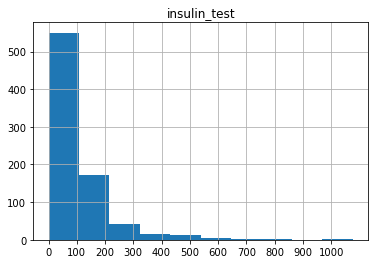

In [10]:
training.hist(column='insulin_test')
plt.xticks(np.arange(0, 1100, 100))
plt.show

Inuslin test seems to be negatively skewed to the right with about 550 observations falling between 0-100 in terms of insulin levels.

### Liver Stress Test

<function matplotlib.pyplot.show(close=None, block=None)>

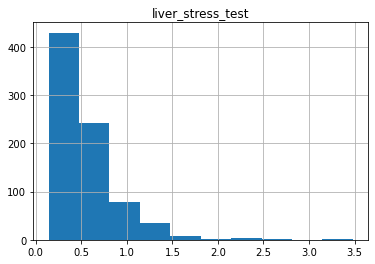

In [11]:
training.hist(column='liver_stress_test')
plt.show

Liver stress test also seems to be negatively skewed with about 400 observations falling between 0.2 and 0.5 in terms of liver stress test.

### Cardio Stress Test

<function matplotlib.pyplot.show(close=None, block=None)>

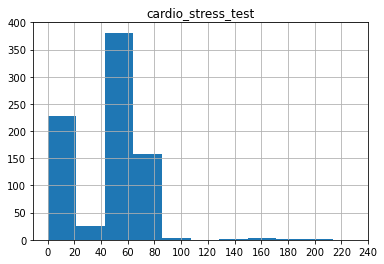

In [12]:
training.hist(column='cardio_stress_test')
plt.xticks(np.arange(0, 250, 20))
plt.show

Cardio stress test seems to be a bimodal distribution as about 225 observations fall between 0-20 while about 375 observations fall between 40-60 in terms of the cardio stress test

### Years Smoking

<function matplotlib.pyplot.show(close=None, block=None)>

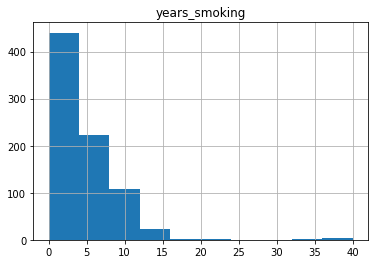

In [13]:
training.hist(column='years_smoking')
plt.show

Finally, years_smoking seems to have a negative distribution as well with around 400 observations falling between 0-5 years of age in terms of the amount of years a person has smoked.

# Data Cleaning

## Multicolinearity

Multicolinearity is found when two variables are highly correlated with each other. Multicolinearity presents a problem as two highly correlated variables could negatively bias the model results.

In order to check for multicolinearity, the variance_inflation_factor function is imported and the calc_vif function is created in order to run VIF on a dataset. Generally, a VIF score of 5 or higher from a variable indicates multicolinearity. 

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [15]:
X_set = training.drop('zeta_disease', axis = 1)
X = X_set
calc_vif(X)

,variables,VIF
0,age,7.308935
1,weight,20.150145
2,bmi,16.129098
3,blood_pressure,13.842831
4,insulin_test,1.867929
5,liver_stress_test,3.625034
6,cardio_stress_test,4.005618
7,years_smoking,2.267619


As seen above, weight seems to have the highest VIF with 20.15. Thus, weight needs to be dropped from the dataset first and then the VIF function needs to be re-ran again on the new dataset:

In [16]:
X_set = X_set.drop('weight', axis = 1)
X = X_set
calc_vif(X)

,variables,VIF
0,age,6.723667
1,bmi,12.092676
2,blood_pressure,12.195049
3,insulin_test,1.811812
4,liver_stress_test,3.476323
5,cardio_stress_test,3.995247
6,years_smoking,2.265152


The blood_pressure variable has a VIF score of 12.19. This is still too high and the blood_pressure variable needs to be dropped as well:

In [17]:
X_set = X_set.drop('blood_pressure', axis = 1)
X = X_set
calc_vif(X)

,variables,VIF
0,age,5.842712
1,bmi,8.083742
2,insulin_test,1.803664
3,liver_stress_test,3.451156
4,cardio_stress_test,3.816195
5,years_smoking,2.261469


The bmi variable has a VIF score of 8.08. Because it is greater than 5, this variable needs to be dropped:

In [18]:
X_set = X_set.drop('bmi', axis = 1)
X = X_set
calc_vif(X)

,variables,VIF
0,age,4.055521
1,insulin_test,1.796565
2,liver_stress_test,3.111434
3,cardio_stress_test,3.088145
4,years_smoking,2.252210


Looking above, it seems multicolinearity has been eliminated from the dataset as there are no VIF scores which are greater than 5. 

The weight, bmi, and blood_pressure variables are dropped below from the dataset as I know that these variables present multicolinearity issues:

In [19]:
training = training.drop(['blood_pressure', 'weight', 'bmi'], axis = 1)
training.head(5)

,age,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,0,1.5038,0,10,0
1,23,71,0.3868,55,2,0
2,47,0,0.2728,0,7,0
3,18,1033,0.6598,56,0,0
4,24,125,0.7608,59,2,0


In [20]:
training.corr()

,age,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
age,1.000000,-0.034294,0.042416,-0.106039,0.372373,0.192925
insulin_test,-0.034294,1.000000,0.175230,0.417894,-0.006292,0.126504
liver_stress_test,0.042416,0.175230,1.000000,0.172048,0.021817,0.184738
cardio_stress_test,-0.106039,0.417894,0.172048,1.000000,-0.080358,0.036090
years_smoking,0.372373,-0.006292,0.021817,-0.080358,1.000000,0.195261
zeta_disease,0.192925,0.126504,0.184738,0.036090,0.195261,1.000000


Looking at the correlation matrix above, it seems that in order: year_smoking, age, liver_stress_test, insulin_test, and cardio_stress_test seem to have a positive correlation on zeta_disease albeit cardio_stress_test seems to have a low score with 0.03 approximately.

## Scaling

As was seen before as well in the histograms above, there are different measurements and scales throughout the dataset which could negatively impact the models. Therefore, I will need to scale the data so that every column (except the dependent variable) is standardized and scaled evenly.

Below, I am importing StandardScaler and initiazling it:

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Next, the binary variable zeta_disease is temporarily removed from the dataset in order to only standardize the independent variables:

In [22]:
x = training.drop(("zeta_disease"), axis=1)
y = training["zeta_disease"]

Then, fit_transform is run on the x variables in order to scale the data:

In [23]:
scaled_data = scaler.fit_transform(x)
print(scaled_data)

[[ 1.66589677 -0.68027185  2.75272183 -1.41888518  1.42534108]
 [-0.57797896 -0.11791643 -0.45250726  0.39086488 -0.4914866 ]
 [ 1.15921516 -0.68027185 -0.77963001 -1.41888518  0.7065307 ]
 ...
 [-0.28844661 -0.68027185 -0.80545549 -1.41888518  0.22732378]
 [ 5.64696662  0.06425505 -0.90301842  0.32505579 -0.73109006]
 [-0.36082969 -0.68027185  0.23617223 -1.41888518 -0.73109006]]


As shown above, the indepedent variables have been scaled so every independent variable has the same scale/measurement. This standardization will help in improving the models.

Finally, the scaled_data is put into a dataframe and the zeta_disease column is brought back into the scaled data dataframe as shown below:

In [24]:
training_scaled_data = pd.DataFrame(scaled_data, columns= x.columns)
training_scaled_data["zeta_disease"] = y
training_scaled_data.head(5)

,age,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,1.665897,-0.680272,2.752722,-1.418885,1.425341,0
1,-0.577979,-0.117916,-0.452507,0.390865,-0.491487,0
2,1.159215,-0.680272,-0.779630,-1.418885,0.706531,0
3,-0.939894,7.501604,0.330866,0.423769,-0.970694,0
4,-0.505596,0.309791,0.620685,0.522483,-0.491487,0


Shown above, the data has now been scaled, pre-processed, and is ready to be used for machine learning models

# Model Building & Evaluation

Because the task is to figure out who will get the Zeta Disease or not (disease/no disease), I can say this is a supervised classification problem as the dependent variable is binary and there are labels present. Given this information, I have several classification options which I will be running such as Logistic Regression, Random Forest, Decision Tree, and XG Boost classifiers to see which model has the best set of metrics (accuracy, precision, recall) and is the overall best model.

First, the dependent variable (zeta_disease) will be dropped from the training data (which is now scaled) in order to separate the dependent variable from the independent variable.

In [25]:
x_train = training_scaled_data.drop('zeta_disease', axis = 1)
x_train.shape

(800, 5)

In [26]:
y_train = training_scaled_data['zeta_disease']
y_train.shape

(800,)

Next, the train_test_split function will be imported in order to split the data into a training set and a testing set. I'll be going with an 80/20 split in this case:

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, random_state=1, train_size=0.8)

In [28]:
X_train.shape

(640, 5)

In [29]:
X_test.shape

(160, 5)

In [30]:
y_train.shape

(640,)

In [31]:
y_test.shape

(160,)

The training and test sets have been created as shown above:

### Logistic Regression

The logistic regression classifier is imported along with the metrics function:

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logistic = LogisticRegression(random_state = 1, fit_intercept = True)

The logistic function is fitted onto the training set:

In [33]:
logistic.fit(X_train,y_train)

LogisticRegression(random_state=1)

The model is then run on the test set:

In [34]:
y_pred = logistic.predict(X_test)

Finally, a confusion matrix, classification report, and ROC curve are generated in order to evaluate the results of the logistic regression model:

[[88 17]
 [42 13]]
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       105
           1       0.43      0.24      0.31        55

    accuracy                           0.63       160
   macro avg       0.56      0.54      0.53       160
weighted avg       0.59      0.63      0.60       160



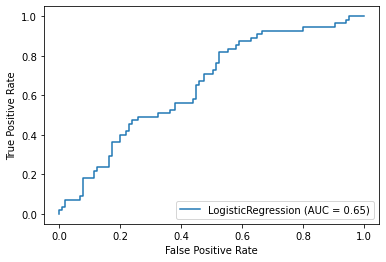

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(logistic, X_test, y_test) 
plt.show()

The results above show the logistic regression model has an accuracy of 63%, a precision of 68% in predicting who won't get the disease, 43% precision in predicting who will get the disease, a recall of 84% in predicting who won't get the disease, and 24% of recall in terms of who will get the disease. Furthermore, the ROC curve shows an AUC of 65% which indicates how good the binary model is at making predictions:

These metrics indicate that this model does a decent job at making predictions in terms of who will get the Zeta disease and who will not. 

### Decision Tree

The next option is to use a Decision Tree algorithm. The Decision tree classifier is imported and then fitted on the training set as shown below:

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 1)
clf = clf.fit(X_train, y_train)

The model is then run on the test set:

In [37]:
y_pred_dec = clf.predict(X_test)

Finally, a confusion matrix, classification report, and ROC curve are generated in order to evaluate the results of the decision tree model:

[[79 26]
 [26 29]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       105
           1       0.53      0.53      0.53        55

    accuracy                           0.68       160
   macro avg       0.64      0.64      0.64       160
weighted avg       0.68      0.68      0.68       160



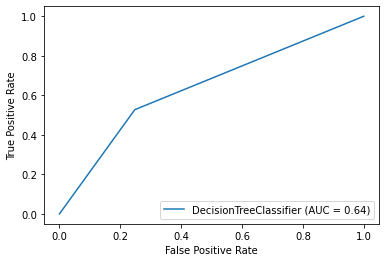

In [38]:
print(confusion_matrix(y_test, y_pred_dec))
print(classification_report(y_test, y_pred_dec))
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

The results above show the decision tree model has an accuracy of 68%, a precision of 75% in predicting who won't get the disease, 53% precision in predicting who will get the disease, a recall of 75% in predicting who won't get the disease, and 53% of recall in terms of who will get the disease. Furthermore, the ROC curve shows an AUC of 64% which indicates how good the binary model is at making predictions:

These metrics show the decision tree model does a better job of predicting who will get the Zeta disease compared to the logistic regression model.

### Random Forest

A random forest model is run in order to compare it against the logistic regression model. Below the random forest model is imported:

In [39]:
from sklearn.ensemble import RandomForestClassifier

Next, the random forest model is initalized and fitted on the training data:

In [40]:
rnd_clf = RandomForestClassifier(random_state = 1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [41]:
y_pred_rlf = rnd_clf.predict(X_test)

Finally, a confusion matrix, classification report, and ROC curve are generated in order to evaluate the results of the random forest model:

[[86 19]
 [30 25]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       105
           1       0.57      0.45      0.51        55

    accuracy                           0.69       160
   macro avg       0.65      0.64      0.64       160
weighted avg       0.68      0.69      0.68       160



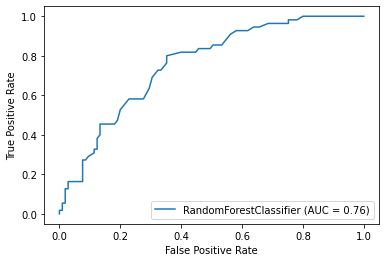

In [42]:
from sklearn import metrics
print(confusion_matrix(y_test, y_pred_rlf))
print(classification_report(y_test, y_pred_rlf))
metrics.plot_roc_curve(rnd_clf, X_test, y_test) 
plt.show()

The results above show the random forest model has an accuracy of 69%, a precision of 74% in predicting who won't get the disease, 57% precision in predicting who will get the disease, a recall of 82% in predicting who won't get the disease, and 45% of recall in terms of who will get the disease. Furthermore, the ROC curve shows an AUC of 76% which indicates how good the binary model is at making predictions.

Based on the evaluation metrics, the random forest seems to be the best one so far at prediciting who will get the Zeta disease.

### XG Boost

Finally, an XG boost algorithim is run in order to see how it compares among the other models. The XGBClassifier algorithim is imported below and fitted on the training data:

In [43]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)

C:\Users\duran\anaconda3again\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

The model is then run on the test set:

In [45]:
y_pred_xg = model_xg.predict(X_test)

Finally, a confusion matrix, classification report, and ROC curve are generated in order to evaluate the results of the xgboost model:

[[84 21]
 [22 33]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       105
           1       0.61      0.60      0.61        55

    accuracy                           0.73       160
   macro avg       0.70      0.70      0.70       160
weighted avg       0.73      0.73      0.73       160



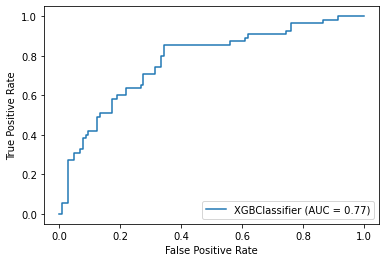

In [46]:
from sklearn import metrics
print(confusion_matrix(y_test, y_pred_xg))
print(classification_report(y_test, y_pred_xg))
metrics.plot_roc_curve(model_xg, X_test, y_test) 
plt.show()

The results above show the XGB model has an accuracy of 73%, a precision of 79% in predicting who won't get the disease, 61% precision in predicting who will get the disease, a recall of 80% in predicting who won't get the disease, and 60% of recall in terms of who will get the disease. Furthermore, the ROC curve shows an AUC of 77% which indicates how good the binary model is at making predictions.

Based on the evaluation metrics, the XGB Classifier seems to do the best job at predicting who will get the Zeta disease based on the independent variables used. Thus, the XG Boost model is the best model and will be the one I will be using to test on new data.

# Hyperparameter Tuning

Even though the XG boost is the best model, it can still be improved by tuning its hyperparameters. The GridSearchCV function is imported to help determine the best hyperparameters to use:

In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

The XGB Classifer model is intialized below with hyperparameters set to binary:logistic as this is a classification problem and a random seed is set along with a nthread of 4:

In [48]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

Next, parameters max_depth, n_estimators, and learning rate are given a set of values:

In [49]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

With the estimator and parameters set, the grid_search is then initialized with 10 fold cross validation and a scoring hyperparametr set to 'roc_auc':

In [50]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

The grid search is then fitted on the training data:

In [51]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.5s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   14.5s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   25.6s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   41.6s


[07:30:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:   51.6s finished
C:\Users\duran\anaconda3again\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scal

After finishing, the best_estimator function is run below to determine what the best hyperparameter values are from the grid search:

In [52]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Based on the output above, these are the hyperparameter values which will be used on the XG boost model again. 

The XGboost model is intialized and fitted on the training data with the hyperparameters tuned based on the grid search best estimator results:

In [53]:
from xgboost import XGBClassifier
model_xg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                      colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                      gamma=0, gpu_id=-1, importance_type=None,
                     interaction_constraints='', learning_rate=0.05, max_delta_step=0,
                     max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=140, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
model_xg.fit(X_train, y_train)

[07:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

The model is then run on the test set:

In [55]:
y_pred_xg = model_xg.predict(X_test)

[[87 18]
 [23 32]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       105
           1       0.64      0.58      0.61        55

    accuracy                           0.74       160
   macro avg       0.72      0.71      0.71       160
weighted avg       0.74      0.74      0.74       160



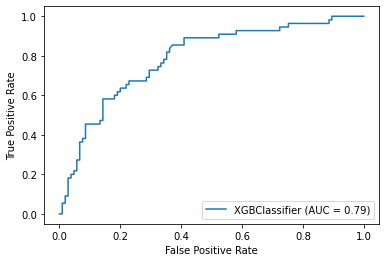

In [56]:
from sklearn import metrics
print(confusion_matrix(y_test, y_pred_xg))
print(classification_report(y_test, y_pred_xg))
metrics.plot_roc_curve(model_xg, X_test, y_test) 
plt.show()

Based on the grid search, it looks like the XG boost classiifer has slightly improved its accuracy from 73% to 74%. The AUC summary statistic has also improved from 77% to 79%. The precision for people who did not get the Zeta disease stayed the same at 79% while the precision slightly improved for people who did get the Zeta disease with 64%. Finally, the recall statistic seems to have improved for people who did not get the Zeta disease with 83% while the recall slightly decreased in prediciting who would get the Zeta disease with 58%. 

In summary, hyperparamter tuning has improved the XG Boost model overall making for more improved predictions.

# Model Interpretation

It's important to be able to interpret the model in order to be able to explain the results effectively with other people. There are two options which will be used to explain the model: xgboost's feature importance plot as well as the SHAP method.

The xgboost feature importance plot is initialized and ran below:

<function matplotlib.pyplot.show(close=None, block=None)>

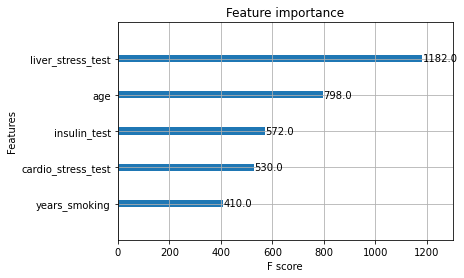

In [57]:
from xgboost import plot_importance
plot_importance(model_xg)
plt.show

Based on the above, it seems liver_stress_test and age were the two most important features in predicting who would get the Zeta disease or not followed by insulin_test, cardio_stress_test, and year_smoking. However, all the variables have high F scores indicating that each variable plays an imporant role in determining who will get the Zeta disease.

Next, the SHAP method is run in order to obtain a more detailed analysis of the features used:

In [58]:
import shap
shap.initjs()

In [59]:
explainer = shap.Explainer(model_xg)

In [60]:
X_test.shape

(160, 5)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


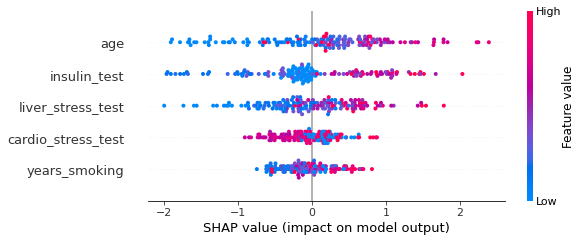

In [61]:
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)

Based on the above SHAP plot, age, insulin_test, liver_stress_test, and years_smoking seem to be the most important factors in determining whether someone will get the Zeta Disease. The interpretation is older individuals who have smoked for a number of years with high liver stress test levels and high insulin levels will be more likely to get the Zeta disease.

# Predictions on new data

Now that I've picked the best model and tuned its hyperparameters, I will now run it on my new data. 
First, the new data needs to be imported:

In [62]:
new_data = pd.read_csv("zeta_prediction_set.csv")
new_data.head(5)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN


As shown above, the zeta_disease column is empty because it is entirely new data and the goal is to predict which users based on the independent varibles are more likely to get the Zeta_Disease.

Becauase new predictions will be made, I will be dropping the zeta_disease column from the dataset as well as weight, bmi, and blood_pressure as these variables were found to have multicolinearity in the training set:

In [63]:
new_data.drop(["zeta_disease", "weight", "bmi", "blood_pressure"], axis=1, inplace=True)

In [64]:
new_data.head(5)

,age,insulin_test,liver_stress_test,cardio_stress_test,years_smoking
0,24,72,1.3968,56,4
1,27,156,1.6608,43,6
2,34,74,1.6958,53,2
3,35,127,1.4608,61,6
4,60,192,1.7798,65,9


Next, the scaled transformation that was done on the training data will also be conducted on the new data as well:

In [65]:
X_test_predict = scaler.transform(new_data[X_train.columns])

The random forest model is then run on the new data

In [66]:
new_data["zeta_disease"] = model_xg.predict(X_test_predict)

In [67]:
new_data.head(5)

,age,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,72,1.3968,56,4,0
1,27,156,1.6608,43,6,1
2,34,74,1.6958,53,2,0
3,35,127,1.4608,61,6,0
4,60,192,1.7798,65,9,1


Finally, the results are written to a csv file within my local directory:

In [68]:
new_data.to_csv('final_predictions.csv', index=False)